In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from BuilderProcessor import TextProcessorBuilder
import matplotlib.pyplot as plt
import pickle

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/enzogiordanoaraujo/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/enzogiordanoaraujo/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/enzogiordanoaraujo/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/enzogiordanoaraujo/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/enzogiordanoaraujo/nltk_data...
[nltk_data]    |   Package

In [2]:
df = pd.read_excel('data/td_arc.xlsx')
text_processor = TextProcessorBuilder().set_stem(False).set_remove_stopwords(False).build()
X = df.Feature.apply(text_processor.process)
y = df.Target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
vectorizer = CountVectorizer()
bow_train = vectorizer.fit_transform(X_train)
vocabulario = vectorizer.get_feature_names_out()
X_train_final = bow_train.toarray()

In [5]:
bow_test = vectorizer.transform(X_test)
X_test_final = bow_test.toarray()

In [6]:
clf = svm.SVC()
clf.fit(X_train_final, y_train)

SVC()

In [7]:
y_pred = clf.predict(X_test_final)

In [8]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

<Figure size 800x600 with 0 Axes>

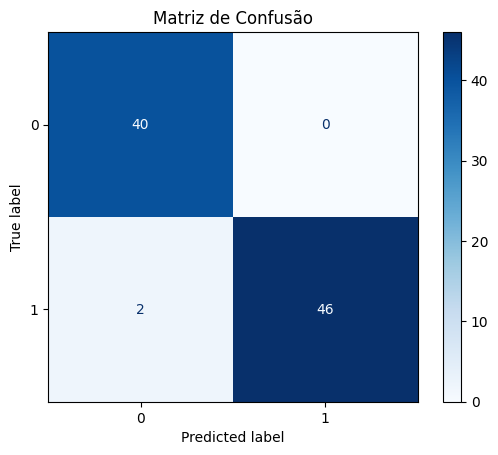

In [9]:
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Matriz de Confusão")
plt.savefig("matriz_confusao.png")  # Salva a imagem como um arquivo
plt.show()

In [10]:
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       1.00      0.96      0.98        48

    accuracy                           0.98        88
   macro avg       0.98      0.98      0.98        88
weighted avg       0.98      0.98      0.98        88


In [11]:
with open('model_arc.pkl', 'wb') as file:
    pickle.dump((clf, vectorizer), file)

In [12]:
def predict(texto):
    processed_text = text_processor.process(texto)
    vectorizer = CountVectorizer(vocabulary=vocabulario)
    nova_entrada = vectorizer.transform([processed_text]).toarray()
    resposta_vetorizada = clf.predict(nova_entrada)
    
    if resposta_vetorizada == 1:
        return "Solicitou agendamento"
    else:
        return "Prompt Normal"


In [15]:
print(predict("Estou com tosse, não vou conseguir comparecer na consulta"))

Solicitou agendamento
